In [24]:
import pandas as pd
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import PyMol

In [20]:
df = pd.read_csv('input/examples.csv')
df

,smiles
0,OCCc1ccn2cnccc12
1,C1CC1Oc1cc2ccncn2c1
2,CNC(=O)c1nccc2cccn12
3,[H]N[C@@H](CCCCN)C(=O)N[C@@H](CCCCN)C(=O)N[C@@...
4,CC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)...


In [16]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

def moltosvg(mol, molSize = (300,300), kekulize = True):
    '''
    https://stackoverflow.com/questions/61659643/rdkit-how-to-draw-high-resolution-chemical-structure'''
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')


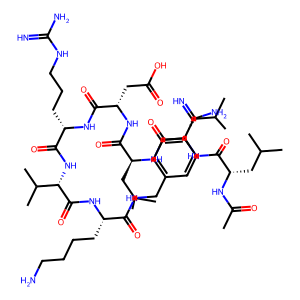

In [21]:
mol = Chem.MolFromSmiles(df.iloc[4][0])
SVG(moltosvg(mol))

In [22]:
v = PyMol.MolViewer()

In [25]:
mol = Chem.MolFromSmiles(df.iloc[4][0])
AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol)

[18:22:35] Molecule does not have explicit Hs. Consider calling AddHs()
[18:22:35] Molecule does not have explicit Hs. Consider calling AddHs()


1

In [26]:
v.ShowMol(mol)

''

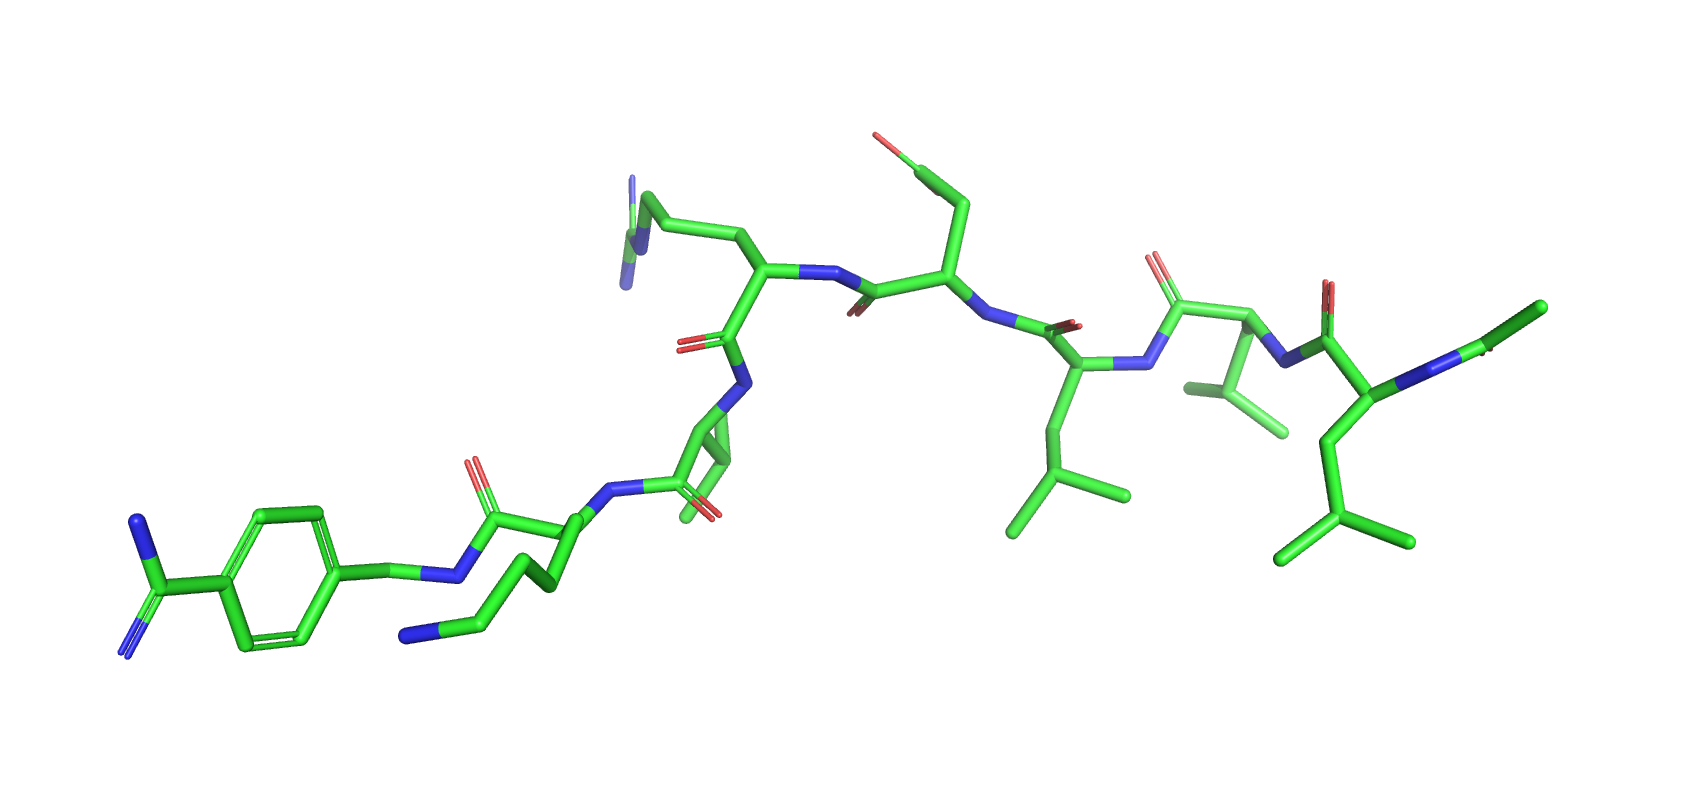

In [29]:
v.server.do('ray')
v.GetPNG()